In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [227]:
def get_pca(X):
    """
    Transform data to 2D points for plotting. Should return an array with shape (n, 2).
    """
    #print (X.shape)
    flatten_model = make_pipeline(
        PCA(2),
        MinMaxScaler(copy=True, feature_range=(0, 1))
    )
    X2 = flatten_model.fit_transform(X)
    #print (X2.shape)
    assert X2.shape == (X.shape[0], 2)
    return X2

In [228]:
def get_clusters(X):
    """
    Find clusters of the weather data.
    """
    model = make_pipeline(
        # TODO
        KMeans(n_clusters=10, random_state=0)
    )
    model.fit(X)
    return model.predict(X)

In [229]:
filename1 = 'monthly-data-labelled.csv'

#data = pd.read_csv(sys.argv[1])
labeled = pd.read_csv(filename1)
labeled = labeled.drop (['year'], axis=1)
X = labeled.drop(['city'], axis = 1)
y = labeled['city']
X2 = get_pca(X)

In [230]:
clusters = get_clusters(X)
clusters

array([6, 9, 9, ..., 9, 6, 9], dtype=int32)

cluster          0   1   2   3   4   5   6   7   8   9
city                                                  
Anchorage        0  19  14   0   1   1   9   0   0  12
Atlanta          0   0   0   0   0   0   0  47   0   0
Atlantic City   30   0   0   0   0   0   0  15   0   0
Calgary          4   0   0   0   0  39   0   0   0   9
Chicago          5   0   0   0   0  45   1   1   0   0
Denver           2   0   0   0   0   1   0   6   0   0
Edmonton         0   3   2   0   0   4  15   0   0  27
Gander           0   8  14   0   8   4  13   0   0   4
Halifax          0   0   0   0   0  41   8   0   0   1
London           0   0   0   0   0  39   1   0   0   2
Los Angeles      0   0   0   0   0   0   0   0  39   0
Miami            0   0   0  43   0   0   0   0   0   0
Montreal         0   3   8   0   0   1  14   0   0   2
New Orleans      0   0   0  44   0   0   0   1   0   0
Ottawa           0   3   4   0   2   7  20   0   0  15
Portland        35   0   0   0   0   0   0   3   0   0
Québec    

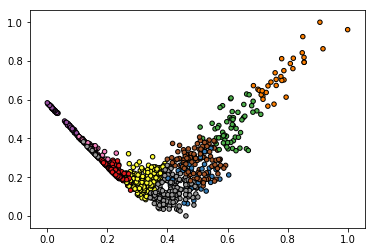

In [231]:
plt.scatter(X2[:, 0], X2[:, 1], c=clusters, cmap='Set1', edgecolor='k', s=20)
plt.savefig('clusters.png')

df = pd.DataFrame({
    'cluster': clusters,
    'city': y,
})
counts = pd.crosstab(df['city'], df['cluster'])
print(counts)